#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
passengers = pd.read_csv('passengers_cleaned.csv', index_col = 0)

KeyboardInterrupt: 

In [9]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2350494 entries, 0 to 2350496
Data columns (total 38 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   departures_scheduled   float64
 1   departures_performed   float64
 2   payload                float64
 3   seats                  float64
 4   passengers             float64
 5   freight                float64
 6   mail                   float64
 7   distance               float64
 8   ramp_to_ramp           float64
 9   air_time               float64
 10  unique_carrier         object 
 11  airline_id             int64  
 12  unique_carrier_name    object 
 13  region                 object 
 14  carrier                object 
 15  carrier_name           object 
 16  carrier_group          int64  
 17  carrier_group_new      int64  
 18  origin_airport_id      int64  
 19  origin_city_market_id  int64  
 20  origin                 object 
 21  origin_city_name       object 
 22  origin_country    

### Step 1. Get top 10 airports based on biggest number of flights and passengers

In [56]:
# check if the departures_performed is the number of flights. get a slice of passengers showing only a day and certain features

db_day = passengers[(passengers.year == 2019) & (passengers.month == 10) & (passengers.day == 12)][['departures_scheduled', 'departures_performed', 'unique_carrier', 'origin_airport_id', 'dest_airport_id']]
db_day.head()

,departures_scheduled,departures_performed,unique_carrier,origin_airport_id,dest_airport_id
780539,0.0,1.0,2AQ,10782,12889
780558,0.0,1.0,3S,12892,11760
780586,0.0,1.0,ADB,12173,10435
780589,0.0,14.0,AY,12101,12892
780594,0.0,14.0,AY,12892,12101


In [57]:
# let's assume departures_performed is the number of flights that flew on this day

In [85]:
# get top 10 businest airports based on passengers
print('Top 10 based on number of passengers')
passengers.groupby('origin').sum()\
[['departures_performed', 'passengers']].\
sort_values(by='passengers', ascending = False)[:10].index.tolist()

Top 10 based on number of passengers


['ATL', 'LAX', 'ORD', 'DFW', 'DEN', 'JFK', 'SFO', 'LAS', 'SEA', 'CLT']

In [86]:
# get top 10 businest airports based on departures_performed
print(' \n Top 10 based on departured_performed')
passengers.groupby('origin').sum()\
[['departures_performed', 'passengers']].\
sort_values(by='departures_performed', ascending = False)[:10].index.tolist()

 
 Top 10 based on departured_performed


['ATL', 'ORD', 'DFW', 'LAX', 'DEN', 'CLT', 'IAH', 'JFK', 'SFO', 'EWR']

### Step 2: Calculate how much traffic do these airports cover
I'll base this on the number of passengers

In [80]:
# get total number of passengers
total_passengers = passengers.passengers.sum()
total_passengers

4929411184.0

In [108]:
# get the airport top 10 list based on number of passengers

airport_list = passengers.groupby('origin').sum()\
[['departures_performed', 'passengers']].\
sort_values(by='passengers', ascending = False)[:10].index.tolist()

In [111]:
# get percentage of traffic these airport cover
dict_traffic = {}
for airport in airport_list:
    traffic = passengers[passengers.origin == airport]['passengers'].sum()
    dict_traffic[airport] = round(traffic/total_passengers*100,2)
print(dict_traffic)

{'ATL': 5.22, 'LAX': 4.17, 'ORD': 3.94, 'DFW': 3.32, 'DEN': 3.06, 'JFK': 3.02, 'SFO': 2.7, 'LAS': 2.38, 'SEA': 2.31, 'CLT': 2.29}


Text(0, 0.5, '% of total traffic covered')

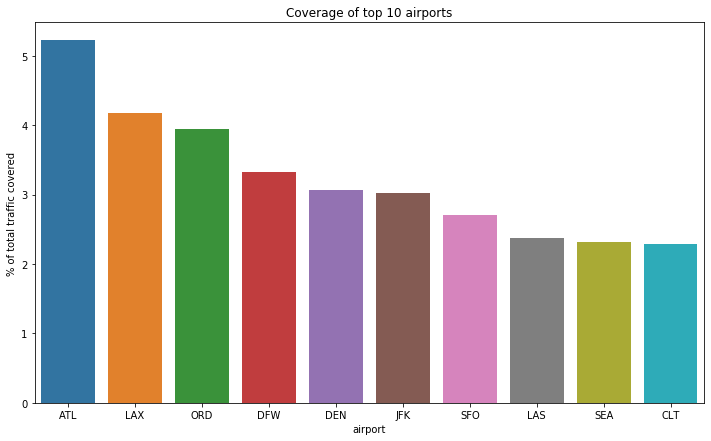

In [112]:
# plot it
plt.figure(figsize=(12,7))
sns.barplot(x=list(dict_traffic.keys()), y=list(dict_traffic.values()))
plt.title("Coverage of top 10 airports")
plt.xlabel("airport")
plt.ylabel("% of total traffic covered")